# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` -  get datasets and data laoding functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Datasets` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# For mac silicon gpu
device = "mps" if torch.backends.mps.is_available() else device
device

'cuda'

## 1. Getting  a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [ ]:
# Setup the training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setup the testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10456380.73it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 197535.15it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3710662.00it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24370515.79it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# Check the length of the training and testing data
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first training example (unpacking train data to give image and its lable)
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
# Get the class names from the train data (number of classification of the dataset)
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Get the class names with their index
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# Get the classification label index
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Shape of the image [color_channels, height, width] and label
image.shape, label

(torch.Size([1, 28, 28]), 9)

### 1.1 Checking the `Input and Output shapes` of the data

In [ ]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Image label name: Ankle boot, Image label index: 9')

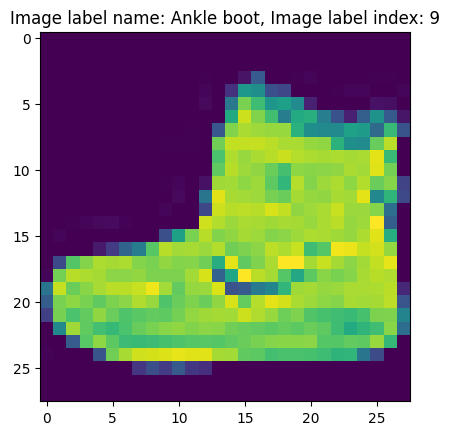

In [ ]:
# Use imshow to convert the numericals into image
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(f"Image label name: {class_names[label]}, Image label index: {label}")

(-0.5, 27.5, 27.5, -0.5)

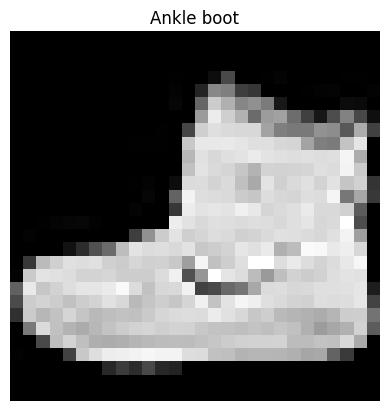

In [ ]:
# Convert the image to gray scale
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

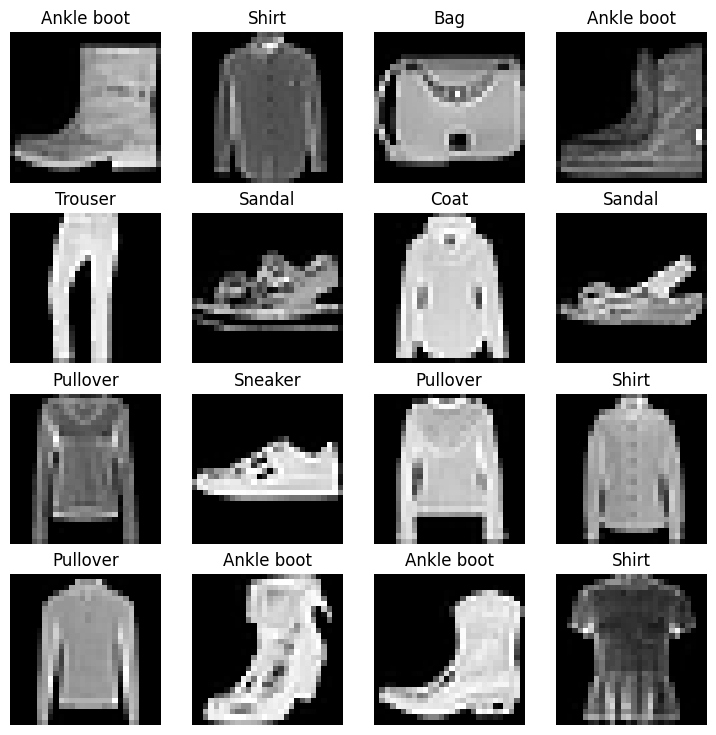

In [ ]:
# Plot more images (set of 16 images [4 rows 4 columns])
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    # TODO: what is `size` in it
    # INFO: `item` is used to convert a tensor into a `integer value`
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[int(random_idx)]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare DataLoader

Right now. our data is in the form of PyTorch Datasets

`DataLoader` turns our dataset inot a `Python Iterable`

More specifically, we want to turn our data into `batches (or mini-batches)`

**Why would we do this?**

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in on hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.


In [ ]:
# Import PyTorch DataLoader
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn train dataset into iterables (batches) - with shuffle
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Turn test dataset into iterables (batches) - without shuffle
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b79502381f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b795023b0a0>)

In [ ]:
# Let's check what we have created
print(f"DataLaoders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLaoders: (<torch.utils.data.dataloader.DataLoader object at 0x7b79502381f0>, <torch.utils.data.dataloader.DataLoader object at 0x7b795023b0a0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"Train features batch shape: {train_features_batch.shape}")
print(f"Train features label shape: {train_labels_batch.shape}")

Train features batch shape: torch.Size([32, 1, 28, 28])
Train features label shape: torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


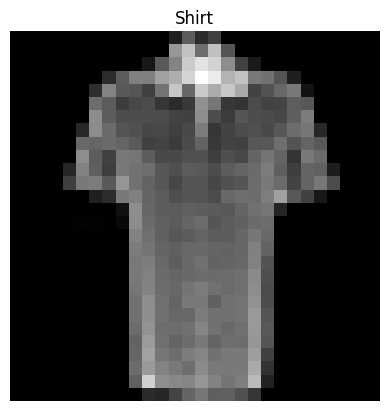

In [ ]:
# Show a sample
torch.manual_seed(42) # To maintain the randomness of the code
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simplt and add complexity when necessary.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, weight]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*weight]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, weight]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*weight]


In [ ]:
from torch import nn

# Create the FashionMNIST Version 0 Model
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        # Neural network layer stack
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    # Foward pass method to override the nn.Module forward method
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
# Set the randomness of the model
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# Dummy tensor to check model_0 is working fine
dummy_x = torch.rand([1, 1, 28, 28])

# Predict using model_0 and check the output
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, out loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [ ]:
# Import the modules used to download the helper functions from the Learn PyTorch repo
from timeit import default_timer as timer
import requests
from pathlib import Path

# Helper functions file download start time
start_time: float = timer()

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

# # Helper functions file download end time
end_time: float = timer()
# Calculate the total time taken to download the file and print it
total_time: float = end_time - start_time
print(f"Time taken to download the helper_functions.py: {total_time:.3f} seconds")

Time taken to download the helper_functions.py: 0.213 seconds


In [ ]:
# Import accuracy metic
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optmizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr=0.01
)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [ ]:
# Import default timer to calculate the time taken by model to train for
# different devices
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: str | None = None) -> float:
    """Prints difference between model train start and end time."""
    total_time: float = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.862700004399812e-05

### 3.3 Creating a training loop and traning a model on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss **`per batch`**.
3. Loop through testing batches, perform testing steps, calculate the test loss **`per batch`**.
4. Print out what's happening.
5. Time it all (for fun).

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Store the train, test loss and test accuracy for model evaluation
train_loss_per_batch = []
test_loss_per_batch = []
test_acc_per_batch = []

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    ### Training
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X_train, y_train) in enumerate(train_dataloader):
        # Set model for training
        model_0.train()

        # 1. Forward pass
        y_pred = model_0(X_train)

        # 2. Calculate the train loss (per batch)
        loss = loss_fn(y_pred, y_train)
        train_loss += loss # accumulate train loss

        # 3. Set optmizer zero grad
        optmizer.zero_grad()

        # 4. Backward propagation
        loss.backward()

        # 5. Gradient descent
        optmizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X_train)}/{len(train_dataloader.dataset)} samples.")

    # Calculate the train loss per batch
    average_train_loss = train_loss / len(train_dataloader)
    train_loss_per_batch.append(average_train_loss)

    ### Testing
    test_loss, test_acc = 0, 0
    # Add a loop to loop through the test batches
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Predict from the model
            test_pred = model_0(X_test)

            # Calculate the test loss (per batch)
            test_loss += loss_fn(test_pred, y_test) # accumulate test loss

            # Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss per batch
        average_test_loss = test_loss / len(test_dataloader)
        test_loss_per_batch.append(average_test_loss)

        # Calculate the test accuracy per batch
        average_test_acc = test_acc / len(test_dataloader)
        test_acc_per_batch.append(average_test_acc)

    # Print out what's happening
    print(f"\nTrain loss: {average_train_loss:.4f} | Test loss: {average_test_loss:.4f} | Test acc: {average_test_acc:.4f}")

    # Calculate the training time
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(
        start=train_time_start_on_cpu,
        end=train_time_end_on_cpu,
        device=str(next(model_0.parameters()).device)
    )

    print("=" * 50)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.9096 | Test loss: 0.6290 | Test acc: 78.6342
Train time on cpu: 11.785 seconds
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5573 | Test loss: 0.5441 | Test acc: 81.1302
Train time on cpu: 20.928 seconds
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5027 | Test loss: 0.5137 | Test acc: 81.9988
Train time on cpu: 30.081 seconds


## 4. Make predictions and get Model 0 results

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
    """Returns a dictionary containing the results of model prediction on data_loader."""
    loss, acc = 0, 0

    # Put model on the target device
    model.to(device)

    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Put data on the target device
            X, y = X.to(device), y.to(device)

            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find the average loss and acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__, # only works when model was created with a class
        "model_acc": acc,
        "model_loss": loss.item(), # item convert the loss type tensor value to float
    }

# Calculate model - returns on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_acc': 81.9988019169329,
 'model_loss': 0.5136752128601074}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
!nvidia-smi

Mon Apr  1 01:52:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0              25W /  70W |    151MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# For mac silicon gpu
device = "mps" if torch.backends.mps.is_available() else device
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [ ]:
# Import the nn module from pytorch
from torch import nn

# Create the pytorch model with non-linear and linear layer
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        # Neural network layer stack
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    # Foward pass method to override the nn.Module forward method
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
# Set the seed to fix the randomness
torch.manual_seed(42)

# Setup model with input parameters
model_1 = FashionMNISTModelV1(
    input_shape=784, # this is the ouput of the flatten later after our 28 * 28 images goes in
    hidden_units=10,
    output_shape=len(class_names)
).to(device) # send to the GPU it it's available

model_1, next(model_1.parameters()).device

(FashionMNISTModelV1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cuda', index=0))

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr=0.01
) # tries to update our model's parameters to reduce the loss

Let's creata function for:
* training loop - `train_step()`
* test loop - `test_step()`

In [ ]:
# Set the seed
torch.manual_seed(42)

# Create a function for training and testing
### Training
def train_step(
        model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn, device:
        torch.device=device
    ):
    """Performs a training with model trying to learn on data_loader"""

    # Store the train loss and train accuracy
    train_loss, train_acc = 0, 0

    # Set model for training
    model.train()

    # Train the model for each batch
    for batch, (X, y) in enumerate(train_dataloader):
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass (output the raw logits from the model)
        y_pred = model(X)

        # 2. Calculate the loss and acc per batch
        loss = loss_fn(y_pred, y)
        train_loss += loss

        accuracy = accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
        train_acc += accuracy

        # 3. Zero the gradient
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()

        # 5. Gradient descent
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Processing for {batch * len(X)}/{len(data_loader.dataset)} samples")

    print(f"Processed all samples")

    # Calculate the train loss per batch
    train_loss = train_loss / len(data_loader)

    # Calculate the train accuracy per batch
    train_acc = train_acc / len(data_loader)

    # Print out the metrics
    print(f"\nTrain loss: {train_loss} | Train accuracy: {train_acc}")


### Test
def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
    """Performs a testing loop step on model going over data_loader"""

    # # Test the model
    # print(f"Test the model\n-------")

    # Store the test loss and test accuracy
    test_loss, test_acc = 0, 0

    # Put model to the target device
    model.to(device)

    # Put model to the eval mode
    model.eval()

    # Model inference mode disable the gradient tracking
    with torch.inference_mode():
        # Evaluate the model for each test batch
        for X, y in data_loader:
            # Put data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate the loss
            loss = loss_fn(y_pred, y)
            test_loss += loss

            accuracy = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            test_acc += accuracy

        # Calculat the test loss per batch
        test_loss = test_loss / len(data_loader)

        # Calculate the test accuracy
        test_acc = test_acc / len(data_loader)

        # Print out the metrics per batch
        print(f"Test loss: {test_loss} | Test accuracy: {test_acc}\n")

In [ ]:
# Set the seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Import the timer
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set the epochs
epochs = 3

# Loop through the epochs to train the model
for epoch in tqdm(range(epochs)):
    # Print out the epochs
    print(f"Epoch: {epoch}\n------")

    # Train the model
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)

    # Test the model
    test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)

    print("=" * 50)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Processing for 0/60000 samples
Processing for 12800/60000 samples
Processing for 25600/60000 samples
Processing for 38400/60000 samples
Processing for 51200/60000 samples
Processed all samples

Train loss: 1.4217853546142578 | Train accuracy: 54.28666666666667
Test loss: 1.1216751337051392 | Test accuracy: 62.15055910543131

Epoch: 1
------
Processing for 0/60000 samples
Processing for 12800/60000 samples
Processing for 25600/60000 samples
Processing for 38400/60000 samples
Processing for 51200/60000 samples
Processed all samples

Train loss: 1.033589243888855 | Train accuracy: 64.61166666666666
Test loss: 1.0001887083053589 | Test accuracy: 64.47683706070288

Epoch: 2
------
Processing for 0/60000 samples
Processing for 12800/60000 samples
Processing for 25600/60000 samples
Processing for 38400/60000 samples
Processing for 51200/60000 samples
Processed all samples

Train loss: 0.9599606990814209 | Train accuracy: 66.05166666666666
Test loss: 0.9633837938308716 | Test a

> **NOTE:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU then GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from th4e GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.

### 6.2 Evaluate the model

In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_acc': 65.40535143769968,
 'model_loss': 0.9633837938308716}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_acc': 81.9988019169329,
 'model_loss': 0.5136752128601074}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer

In [ ]:
import torch
from torch import nn

# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    Model from CNN explainer website.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, # number of channels to the image
                      out_channels=hidden_units,
                      kernel_size=3, # it can be tuple as well (3, 3)
                      stride=1,
                      padding=1), # values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        # print(f"Output shape of classifier: {x.shape}")
        return x

In [ ]:
image.shape[0] # this is the channels

1

In [ ]:
class_names, len(class_names)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

In [ ]:
# Set the seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

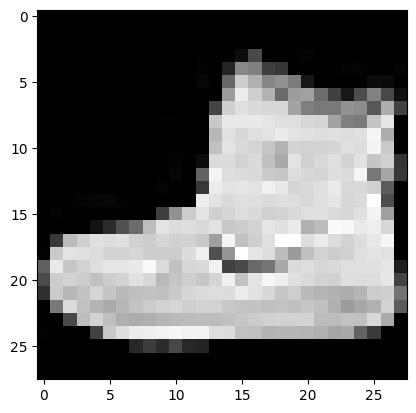

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")

In [ ]:
# Random tensor to test the forward pass
random_image_tensor = torch.randn(size=(1, 28, 28))

random_image_tensor.unsqueeze(dim=0).shape, \
random_image_tensor.unsqueeze(dim=1).shape, \
random_image_tensor.unsqueeze(dim=2).shape, \
random_image_tensor.unsqueeze(dim=3).shape

(torch.Size([1, 1, 28, 28]),
 torch.Size([1, 1, 28, 28]),
 torch.Size([1, 28, 1, 28]),
 torch.Size([1, 28, 28, 1]))

In [ ]:
# Pass through the model
model_2(random_image_tensor.unsqueeze(dim=0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [ ]:
next(iter(model_2.parameters()))

Parameter containing:
tensor([[[[ 0.2548,  0.2767, -0.0781],
          [ 0.3062, -0.0730,  0.0673],
          [-0.1623,  0.1958,  0.2938]]],


        [[[-0.2445,  0.2897,  0.0624],
          [ 0.2463,  0.0451,  0.1607],
          [-0.0471,  0.2570,  0.0493]]],


        [[[-0.1556,  0.0850, -0.1536],
          [-0.0391, -0.1354,  0.2211],
          [-0.2631, -0.1537, -0.0941]]],


        [[[-0.2004,  0.0315, -0.3292],
          [ 0.3010, -0.2832,  0.2573],
          [ 0.0555, -0.1082,  0.2060]]],


        [[[ 0.0520,  0.2693,  0.0364],
          [-0.1051,  0.0896, -0.0904],
          [ 0.1403,  0.2976,  0.1927]]],


        [[[-0.1457,  0.1924,  0.0596],
          [ 0.1693, -0.2032, -0.3300],
          [-0.1288, -0.2557,  0.2735]]],


        [[[ 0.0960,  0.1381,  0.1054],
          [-0.0058,  0.2609, -0.2368],
          [ 0.0210, -0.2275,  0.1028]]],


        [[[-0.1148,  0.1021, -0.0694],
          [ 0.2765, -0.1976, -0.1988],
          [-0.1988,  0.2998,  0.1111]]],


        [[

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
# Set the seed
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
# Set the seed
torch.manual_seed(42)

# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d`

In [ ]:
# Set the seed
torch.manual_seed(42)

# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max_pool_layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([10, 32, 32])


Experimenting with smaller tensor's

In [ ]:
# Set the seed
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Shape of the random tensor: {random_tensor.shape}")
print(f"Value of the random tensor:\n{random_tensor}")

# Creata a max_pool_layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max_pool_layer
random_tensor_through_max_pool_layer = max_pool_layer(random_tensor)

print(f"\nShape of the random tensor through max_pool_layer(): {random_tensor_through_max_pool_layer.shape}")
print(f"Value of the random tensor through max_pool_layer():\n{random_tensor_through_max_pool_layer}")

Shape of the random tensor: torch.Size([1, 1, 2, 2])
Value of the random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Shape of the random tensor through max_pool_layer(): torch.Size([1, 1, 1, 1])
Value of the random tensor through max_pool_layer():
tensor([[[[0.3367]]]])


Experimenting with the actual size of the tensor (same as per image size - (28, 28))

In [ ]:
# Set the seed
torch.manual_seed(42)

# Create the same shape random tensor as our images
random_tensor = torch.randn(size=(1, 1, 28, 28))

# Create a max_pool_layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through max_pool_layer twice (same as our model)
random_tensor_through_max_pool_layer_once = max_pool_layer(random_tensor)
print(f"Shape of the random tensor through max pool layer first time: {random_tensor_through_max_pool_layer_once.shape}")

random_tensor_through_max_pool_layer_twice = max_pool_layer(random_tensor_through_max_pool_layer_once)
print(f"Shape of the random tensor through max pool layer second time: {random_tensor_through_max_pool_layer_twice.shape}")

Shape of the random tensor through max pool layer first time: torch.Size([1, 1, 14, 14])
Shape of the random tensor through max pool layer second time: torch.Size([1, 1, 7, 7])


### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [ ]:
# Set the seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Calculate the time taken by model
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"{'=' * 10}\nEpoch: {epoch}\n{'-' * 7}")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Processing for 0/60000 samples
Processing for 12800/60000 samples
Processing for 25600/60000 samples
Processing for 38400/60000 samples
Processing for 51200/60000 samples
Processed all samples

Train loss: 0.5880289077758789 | Train accuracy: 78.62666666666667
Test loss: 0.38489386439323425 | Test accuracy: 86.42172523961662

Epoch: 1
-------
Processing for 0/60000 samples
Processing for 12800/60000 samples
Processing for 25600/60000 samples
Processing for 38400/60000 samples
Processing for 51200/60000 samples
Processed all samples

Train loss: 0.3638988137245178 | Train accuracy: 86.865
Test loss: 0.35299620032310486 | Test accuracy: 86.81110223642173

Epoch: 2
-------
Processing for 0/60000 samples
Processing for 12800/60000 samples
Processing for 25600/60000 samples
Processing for 38400/60000 samples
Processing for 51200/60000 samples
Processed all samples

Train loss: 0.32466381788253784 | Train accuracy: 88.21833333333333
Test loss: 0.32050246000289917 | Test accu

In [ ]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_acc': 88.46845047923323,
 'model_loss': 0.32050246000289917}

## 8. Compare model results and training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_acc,model_loss
0,FashionMNISTModelV0,81.998802,0.513675
1,FashionMNISTModelV1,65.405351,0.963384
2,FashionMNISTModelV2,88.468450,0.320502


In [ ]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_acc,model_loss,training_time
0,FashionMNISTModelV0,81.998802,0.513675,30.081401
1,FashionMNISTModelV1,65.405351,0.963384,50.441894
2,FashionMNISTModelV2,88.468450,0.320502,49.560647


Text(0, 0.5, 'model')

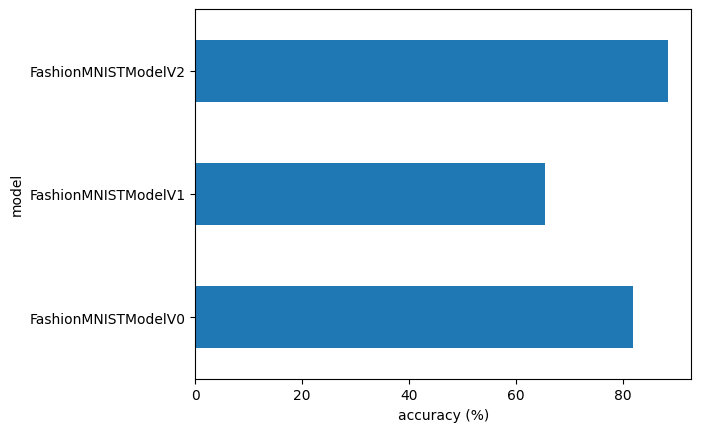

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

Text(0, 0.5, 'model')

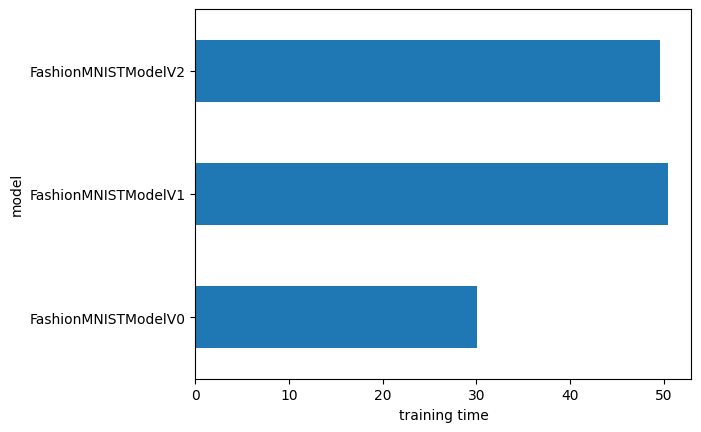

In [ ]:
compare_results.set_index("model_name")["training_time"].plot(kind="barh")
plt.xlabel("training time")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample (add a batch dimension and pass to target device)
            # print(f"Shape of sample before squeeze: {sample.shape}")
            sample = torch.unsqueeze(sample, dim=0).to(device)
            # print(f"Shape of sample after squeeze: {sample.shape}")

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # This will also work bcoz we just need the max value index
            # pred_prob = pred_logit.squeeze()

            # Get pre_prod off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

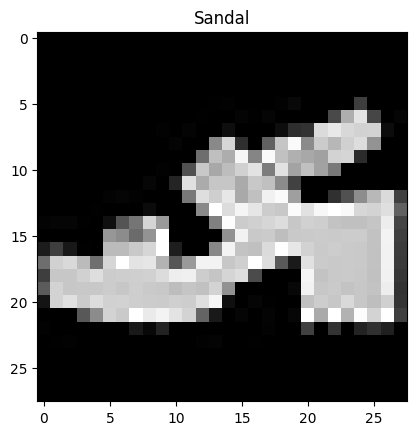

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two predictions probabilities
pred_probs[:2]

tensor([[6.5882e-08, 8.4146e-09, 4.1745e-08, 4.1440e-08, 2.8894e-09, 9.9993e-01,
         4.9442e-08, 5.3047e-06, 1.4485e-05, 4.5633e-05],
        [5.8502e-02, 5.0363e-01, 2.5407e-03, 3.5434e-01, 3.3311e-02, 2.2700e-04,
         4.5737e-02, 9.4196e-04, 5.1980e-04, 2.4757e-04]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
[test_label == pred_class
 for test_label, pred_class in zip(test_labels, pred_classes)]

[tensor(True),
 tensor(True),
 tensor(True),
 tensor(True),
 tensor(True),
 tensor(True),
 tensor(True),
 tensor(True),
 tensor(True)]

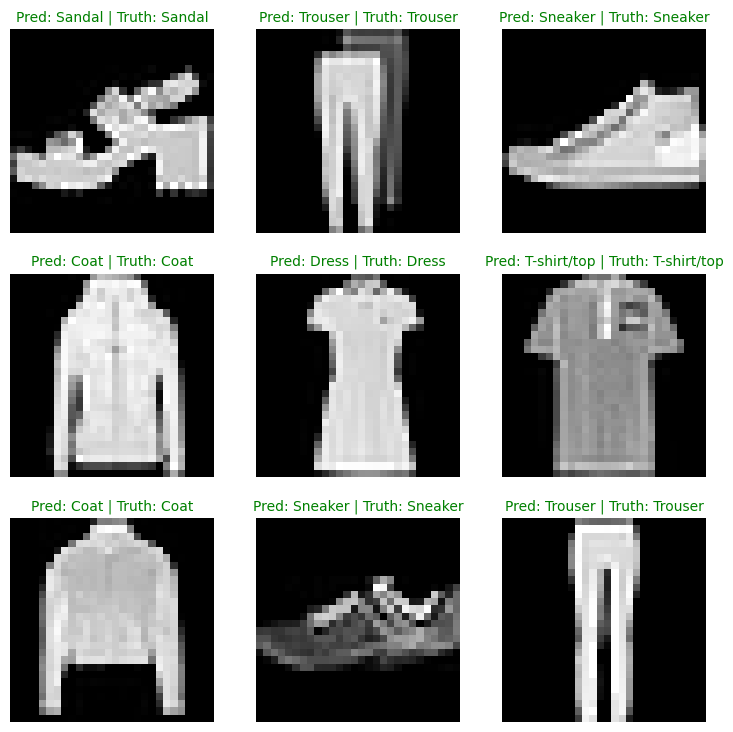

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows, ncols = 3, 3

for i, sample in enumerate(test_samples):
    # Create subsplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction (in texr form, eg. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # Create a title for the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluation your classification models visually.

1. Make prediction with our trained model on the test dataset.
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlextent.plotting.plot_confusion_matrix()`

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions..."):
        # Send data to the target device
        X, y = X.to(device), y.to(device)

        # Forward pass (model outputs raw logits)
        y_logits = model_2(X)

        # Convert logits to the prediction probability
        y_pred = torch.softmax(y_logits.squeeze(), dim=1).argmax(dim=1)

        # Put prediction on CPU for further evalutation
        y_preds.append(y_pred.cpu())

# Concatinate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if required packages are installed and if not, install them...
try:
    import torchmetrics, mlxtend
    print(f"mixtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtent version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mixtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
# Predicted targets
y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
# True targets
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

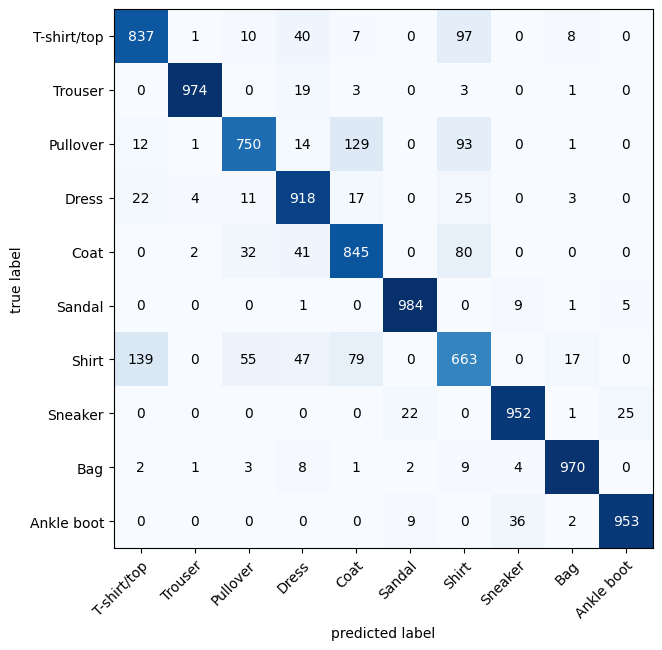

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
conf_mat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
conf_mat_tensor = conf_mat(preds=y_pred_tensor,
                           target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

## 11. Save and load best performing model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_acc': 88.46845047923323,
 'model_loss': 0.32050246000289917}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_acc': 88.46845047923323,
 'model_loss': 0.32050246000289917}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-03) # this is to set the tolerance level

tensor(True)